In [152]:
import pandas as pd
baloon= pd.read_csv(r"C:\Users\ANONYMOUS\Documents\MACHINE\DATASET\cs50\balloons_dataset.csv")
print(baloon)

     color   size      act    age inflated
0   YELLOW  SMALL  STRETCH  ADULT        T
1   YELLOW  SMALL  STRETCH  ADULT        T
2   YELLOW  SMALL  STRETCH  ADULT        T
3   YELLOW  SMALL  STRETCH  ADULT        T
4   YELLOW  SMALL  STRETCH  ADULT        T
..     ...    ...      ...    ...      ...
95  PURPLE  LARGE      DIP  CHILD        F
96  PURPLE  LARGE      DIP  CHILD        F
97  PURPLE  LARGE      DIP  CHILD        F
98  PURPLE  LARGE      DIP  CHILD        F
99  PURPLE  LARGE      DIP  CHILD        F

[100 rows x 5 columns]


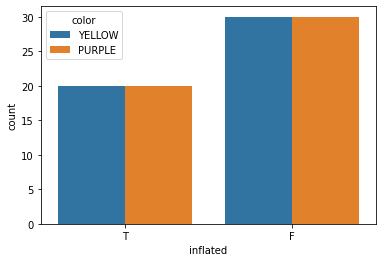

In [153]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(x="inflated", hue="color", data=baloon)

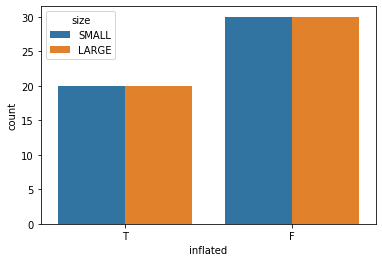

In [154]:
sb.countplot(x="inflated", hue="size", data=baloon)

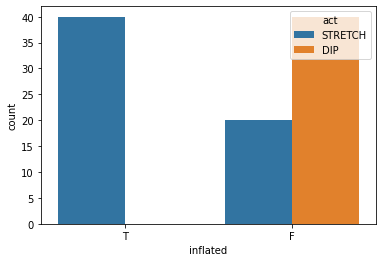

In [155]:
sb.countplot(x="inflated", hue="act", data=baloon)

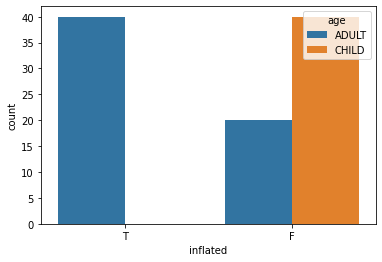

In [156]:
sb.countplot(x="inflated", hue="age", data=baloon)

In [157]:
X=baloon[["act", "age"]]
print(X)

        act    age
0   STRETCH  ADULT
1   STRETCH  ADULT
2   STRETCH  ADULT
3   STRETCH  ADULT
4   STRETCH  ADULT
..      ...    ...
95      DIP  CHILD
96      DIP  CHILD
97      DIP  CHILD
98      DIP  CHILD
99      DIP  CHILD

[100 rows x 2 columns]


In [158]:
Act=pd.get_dummies(X["act"], drop_first=True)

In [159]:
Age=pd.get_dummies(X["age"], drop_first=True)
print(Age)

    CHILD
0       0
1       0
2       0
3       0
4       0
..    ...
95      1
96      1
97      1
98      1
99      1

[100 rows x 1 columns]


In [160]:
X=pd.DataFrame()
X=pd.concat([X,Age, Act], axis=1)
X=X.values

In [161]:
Y=pd.get_dummies(baloon["inflated"], drop_first=True)
Y=Y.values.ravel()

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [163]:
log.fit(x_train, y_train)

LogisticRegression()

In [164]:
y_predict=log.predict(x_test)

In [165]:
print(y_predict)

[0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0]


In [166]:
print(y_test)

[0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0]


In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [168]:
confusion_matrix(y_test, y_predict)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [169]:
log.score(x_test, y_test)

1.0